In [1]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights',
 'RegNet_X_1_6GF_Weights',
 'R

In [2]:
resnet = models.resnet101(pretrained=True)

C:\Users\van\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\van\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
from torchvision import transforms
preprocess = transforms.Compose([
	transforms.Resize(256),            # 轉換尺寸
	transforms.CenterCrop(224),        # 進行裁剪
	transforms.ToTensor(),             # 轉換為張量
	transforms.Normalize(              # 正規化處理
		mean=[0.485, 0.456, 0.406],    # 手動設定各色彩通道的平均值(mean)
		std=[0.229, 0.244, 0.225]	   # 手動設定各色彩通道的標準差(standard deviation)
	)
])


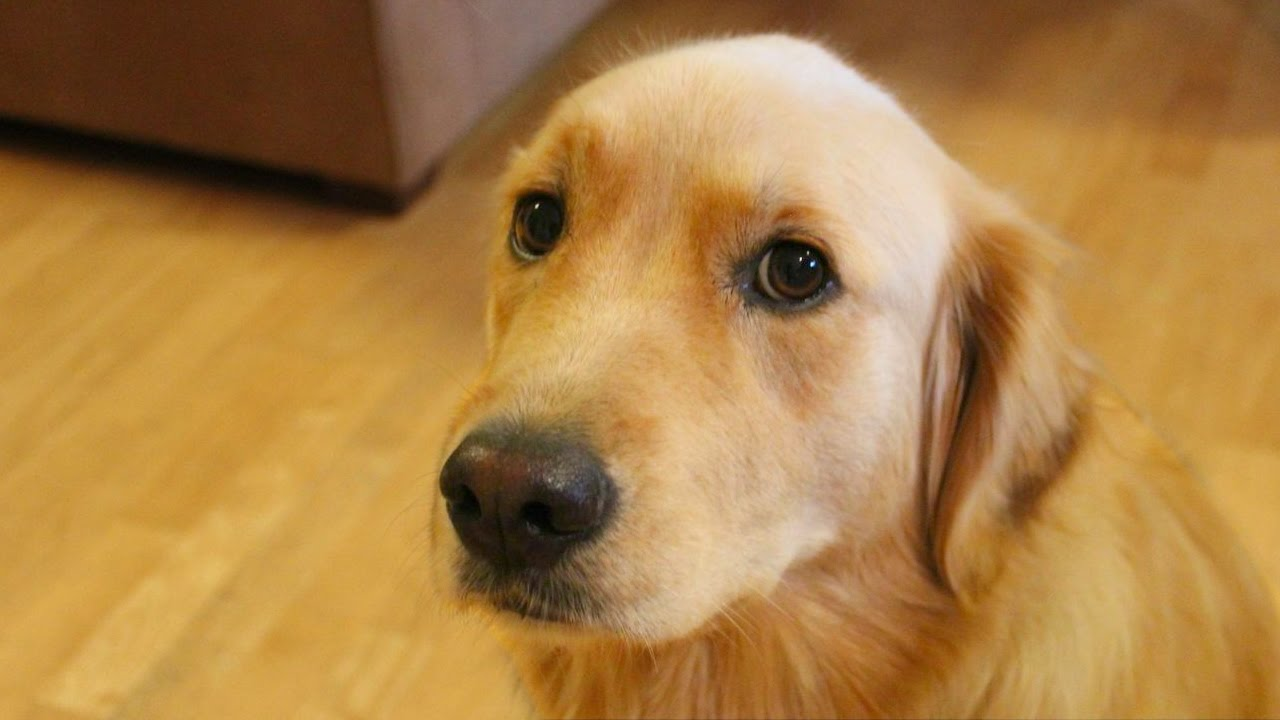

In [6]:
from PIL import Image

img = Image.open("../data/p1ch2/bobby.jpg")  # 照片路徑可依照需求更改

img


In [8]:
img_t = preprocess(img)

img_t.shape

torch.Size([3, 224, 224])

In [10]:
import torch

batch_t = torch.unsqueeze(img_t, 0)  # 在第0階增加一個代表批次量的階

batch_t.shape


torch.Size([1, 3, 224, 224])

In [12]:
resnet.eval()  # 將模型設為eval模式

out = resnet(batch_t)  # 載入預處理過後的圖片

out  # 顯示模型中的1000個類別對圖片的信心分數


tensor([[-3.2557e+00, -1.3961e+00, -2.3199e+00, -3.1371e+00, -3.3257e+00,
         -1.3056e+00, -1.8454e+00, -2.7427e+00, -1.4325e+00, -2.9971e+00,
         -1.8477e+00, -1.5805e+00, -2.4665e+00, -3.1520e+00, -2.5429e+00,
         -2.4519e+00, -3.3922e+00, -8.2604e-01, -5.9424e-01, -1.0587e+00,
         -2.7778e+00, -3.7885e+00, -2.1920e+00, -1.1273e+00, -7.1100e-01,
         -1.2404e+00, -3.1687e+00, -2.3569e+00, -2.6335e+00, -3.2604e+00,
         -3.3921e+00, -1.7505e+00, -2.0211e+00, -2.2875e+00, -1.9966e+00,
         -3.2367e+00, -1.1162e+00, -1.1809e+00, -1.4038e+00, -1.0033e+00,
         -3.6669e-01, -1.8056e+00,  1.3924e+00,  1.8296e-01, -2.2109e+00,
         -1.7485e+00,  9.6652e-01, -9.2427e-01, -2.8047e+00, -3.0614e+00,
         -2.9869e+00, -1.7423e+00, -2.3257e+00, -2.2248e+00, -2.1808e+00,
         -1.3698e+00, -8.3072e-01, -2.6464e+00, -3.4007e+00, -6.1642e-01,
         -7.0168e-01, -1.3767e+00, -1.1007e+00, -1.8635e+00, -1.6694e+00,
         -2.2767e+00, -2.0194e+00, -7.

In [14]:
with open("../data/p1ch2/imagenet_classes.txt") as f:
	labels = [line.strip() for line in f.readlines()]


In [26]:
_, index = torch.max(out, 1)  # 找出out張量的第1軸中，最大值的索引

index


tensor([207])

In [25]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

labels[index[0]], percentage[index[0]].item()  # 分數最高的標籤，最高的分數


('golden retriever', 96.75458526611328)

In [27]:
_, indices = torch.sort(out, descending=True)  # 對分數進行降冪排序

indices


tensor([[207, 208, 219, 168, 852, 213, 205, 162, 215, 212, 220, 539, 214, 434,
         216, 159, 231, 218, 211, 176, 227, 805, 165, 222, 263, 209, 175, 230,
         257, 154, 552, 164, 411, 161, 184, 700, 206, 793, 239, 244, 238, 185,
         999, 160, 232, 273, 163, 260, 259, 166, 182, 589, 266, 931, 234, 452,
         204, 752, 156, 264, 167, 223, 251, 240, 256, 192, 929, 217, 797, 765,
         879, 200, 414, 813, 543, 191, 736, 170, 267, 515, 882, 638, 478, 236,
         828, 785, 705, 998, 193, 659, 799, 178, 202, 158, 961, 574, 876, 247,
         757, 428, 226, 265, 197, 463, 904, 750, 767, 534, 578, 868, 415, 496,
         722, 641, 201, 735, 910, 990, 151, 235, 615, 189, 811, 591, 153, 221,
         898, 241, 462, 549, 443, 808, 196, 433, 255, 177, 676, 171, 939, 947,
         522, 248, 673, 224, 693, 152, 559, 761, 448, 429, 187, 210, 731, 948,
         180, 435, 258, 199, 818, 733, 237, 618, 472, 293, 779, 840, 987, 194,
         740, 181, 721, 639, 174, 776, 660, 253, 824

In [28]:
# 列出前5高的類別
[(labels[idx], percentage[idx].item()) for idx in indices[0][: 5]]


[('golden retriever', 96.75458526611328),
 ('Labrador retriever', 2.02895188331604),
 ('cocker spaniel, English cocker spaniel, cocker', 0.6126311421394348),
 ('redbone', 0.19434139132499695),
 ('tennis ball', 0.09723786264657974)]